## MATH 4/5388: Machine Learning Methods
## Homework 3
### Due date: Thursday, March 6

#### Submission Instruction:
* Submit both the Jupyter notebook file (.ipynb) and a PDF copy of the notebook.
* Ensure that your notebook runs properly before submitting it:
    * Kernel -> Restart & Run All to ensure that there are no errors.
* To generate a PDF of your notebook:
    * File -> Print Preview followed by printing to a PDF from your browser;
    or:
    * File -> Download as -> PDF via LaTeX.
* If this doesn’t work, try first exporting as an HTML file and then converting that to PDF (load it in a web browser and print it to PDF).

---
### Problem 1 (40 points)

Suppose that you wish to classify an observation $X \in \mathbb{R}$ into apples and oranges. You fit a logistic regression model and find that:

\begin{equation*}
P(Y = \text{orange} | X = x) = \frac{\exp(\hat{\beta}_0 + \hat{\beta}_1 x)}{1 + \exp(\hat{\beta}_0 + \hat{\beta}_1 x)}
\end{equation*}

Your friend fits a logistic regression model to the same data using the softmax formulation, and finds that:

\begin{equation*}
P(Y = \text{orange} | X = x) = \frac{\exp(\hat{\alpha}_{\text{orange},0} + \hat{\alpha}_{\text{orange},1} x)}{\exp(\hat{\alpha}_{\text{orange},0} + \hat{\alpha}_{\text{orange},1} x) + \exp(\hat{\alpha}_{\text{apple},0} + \hat{\alpha}_{\text{apple},1} x)}
\end{equation*}

The **log odds** (or logit) of an event is defined as the natural logarithm of the odds, where the odds are given by the ratio of the probability of the event occurring to the probability of it not occurring:

\begin{equation*}
\text{log odds} = \log \left( \frac{P(Y = \text{orange} | X = x)}{P(Y = \text{apple} | X = x)} \right)
\end{equation*}

where:

\begin{equation*}
P(Y = \text{apple} | X = x) = 1 - P(Y = \text{orange} | X = x)
\end{equation*}

In other words, the log odds measure how much more likely one class is compared to the other on a logarithmic scale.

### Questions

- (a) What is the log odds of orange versus apple in your model? [MATH 4388 and 5388]

- (b)  What is the log odds of orange versus apple in your friend’s model? [MATH 4388 and 5388]

- (c)  Suppose that in your model, $\hat{\beta}_0 = 2$ and $\hat{\beta}_1 = -1$. What are the coefficient estimates in your friend’s model? Be as specific as possible. [MATH 5388]

- (d) Now suppose that you and your friend fit the same two models on a different data set. This time, your friend gets the coefficient estimates. What are the coefficient estimates in your model? [MATH 5388]

\begin{equation*}
\hat{\alpha}_{\text{orange},0} = 1.2, \quad \hat{\alpha}_{\text{orange},1} = -2
\end{equation*}

\begin{equation*}
\hat{\alpha}_{\text{apple},0} = 3, \quad \hat{\alpha}_{\text{apple},1} = 0.6
\end{equation*}



![Question1](https://drive.google.com/uc?id=1tr_IDQC2N2xBGcN2b_DlQTUfthiQfyn9)

---
### Problem 2 (20 points)


We collect data for a group of students in a machine learning class with the following variables:

- $X_1$ = hours studied
- $X_2$ =  GPA
- $Y = 1$ if the student receives an A, 0 otherwise

A logistic regression model is fit, and the estimated coefficients are:

\begin{equation*}
\hat{\beta}_0 = -6, \quad \hat{\beta}_1 = 0.05, \quad \hat{\beta}_2 = 1.
\end{equation*}

The logistic regression model estimates the probability of receiving an A as:

\begin{equation*}
P(Y = 1 | X_1, X_2) = \frac{\exp(\hat{\beta}_0 + \hat{\beta}_1 X_1 + \hat{\beta}_2 X_2)}{1 + \exp(\hat{\beta}_0 + \hat{\beta}_1 X_1 + \hat{\beta}_2 X_2)}
\end{equation*}

### Questions

- (a) Estimate the probability that a student who studies for 40 hours and has an undergraduate GPA of 3.5 gets an A.

- (b) Find the number of hours $X_1$ a student with a GPA of 3.5 must study to have a 50% chance of receiving an A.

![Question2](https://drive.google.com/uc?id=1UEVufBxgwRsR8VaL4wD2iCCq82cWJ16a)

### Problem 3 (40 points)

In this assignment, you will work with the Breast Cancer dataset from `sklearn.datasets`. Your task is to:
1. Load the dataset and split it into training and testing sets.
2. Train a Logistic Regression model to classify whether a tumor is malignant or benign.
3. Evaluate the model's performance using classification metrics.
4. Visualize the Precision-Recall Curve.

### Questions

- (a) Use `sklearn.datasets.load_breast_cancer` to load the dataset and perform the following steps:

    - Extract the input features and target labels.
    - What are the labels for Malignant (M) and Benign (B) classes?
    - Split the data into 80% training and 20% testing using `train_test_split` from `sklearn.model_selection` with `random_state=12` for reproducibility.
    - Print the number of samples in the training and test sets.

- (b) Train a Logistic Regression model using `sklearn.linear_model.LogisticRegression` with `solver="liblinear"`.
    - Fit the model using the training data.
    - Print the model’s coefficients and intercept.

- (c) Compute the following metrics on the test set:
    - Confusion Matrix with suitable labels (Malignant and Benign)
    - Classification Accuracy
    - Precision
    - Recall
    - F1-score

- (d) Plot the Precision-Recall Curve.


In [1]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

list(breast_cancer)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [2]:
input_features = breast_cancer['feature_names']
target_labels = breast_cancer['target_names']

target_labels

array(['malignant', 'benign'], dtype='<U9')

In [3]:
from sklearn.model_selection import train_test_split

X, y = breast_cancer.data, breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

print(len(X_train))
print(len(X_test))

455
114


In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear")
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope (w): {slope}")
print(f"Intercept (w_0): {intercept}")

Slope (w): [ 2.11743172  0.10755408 -0.0712765  -0.0026603  -0.15483586 -0.40708918
 -0.64915655 -0.34200387 -0.22674871 -0.02632768 -0.02244492  1.27564669
  0.01689512 -0.09518242 -0.01687969  0.00312509 -0.04899734 -0.04026179
 -0.0425205   0.00622276  1.26583663 -0.33748624 -0.11918295 -0.02466934
 -0.28685003 -1.15896635 -1.60323245 -0.65926289 -0.69729742 -0.1166056 ]
Intercept (w_0): [0.39698113]


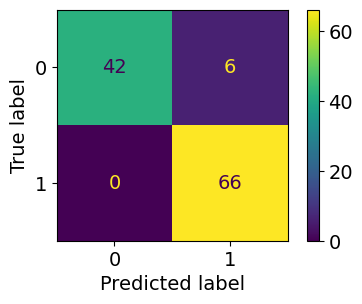

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

plt.rcParams.update({'font.size': 14, "figure.figsize": (5,3)})

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

plt.show()

In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

cross_val = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", cross_val.mean())
print("Precision: %0.2f" %prec)
print("Recall: %0.2f" %rec)
print("F1: %0.2f" %f1)

Accuracy: 0.9516483516483516
Precision: 0.92
Recall: 1.00
F1: 0.96


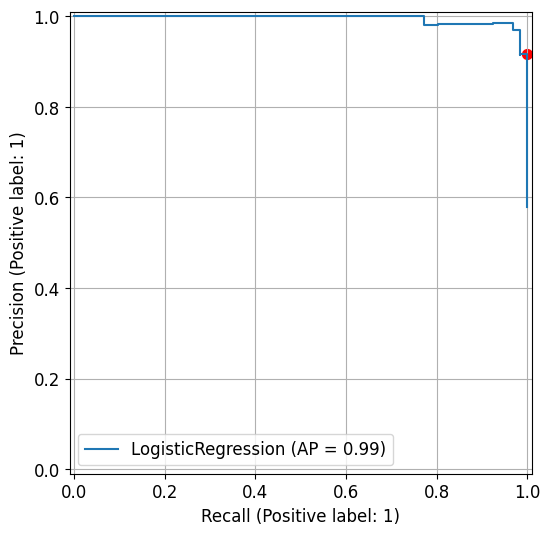

In [7]:
from sklearn.metrics import PrecisionRecallDisplay

plt.rcParams.update({'font.size': 12, "figure.figsize": (7,6)})

PrecisionRecallDisplay.from_estimator(model, X_test, y_test)

plt.scatter(recall_score(y_test, y_pred), precision_score(y_test, y_pred), c = 'r', s=50)

plt.grid()

plt.show()